In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set_palette("pastel")

In [4]:
donor_df = pd.read_csv('OrigFiles/DonorInformation.csv')  

In [5]:
donor_df.head()

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2


In [6]:
#randomly assign an age within the range.
d1=donor_df["age"][donor_df['age']=="90-94"]
for i in range(0, len(d1.index)):
    donor_df.loc[d1.index[i], 'age'] = random.randint(90, 94)

d2=donor_df["age"][donor_df['age']=="95-99"]
for i in range(0, len(d2.index)):
    donor_df.loc[d2.index[i], 'age'] = random.randint(95, 99)

d3=donor_df["age"][donor_df['age']=="100+"]
for i in range(0, len(d3.index)):
    donor_df.loc[d3.index[i], 'age'] = random.randint(100, 105)

donor_df['age'] = donor_df['age'].astype(int)    

<AxesSubplot:xlabel='education_years', ylabel='Count'>

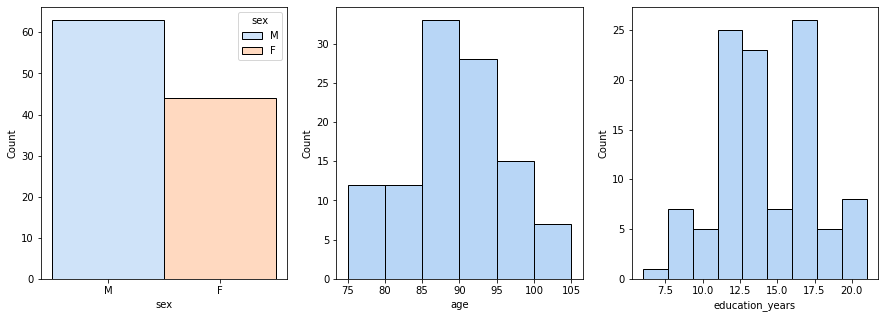

In [7]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.histplot(donor_df,  x="sex", hue="sex", ax=axs[0])
sns.histplot(donor_df,  x="age", bins=[75, 80, 85, 90, 95, 100, 105] , ax=axs[1])
sns.histplot(donor_df,  x="education_years", ax=axs[2])

Dementia / pathology variables

In [8]:
donor_df['apo_e4_allele']= donor_df['apo_e4_allele'].fillna('N/A')
sorter =[ '< 10 sec', '10 sec - 1 min', '1-2 min', '3-5 min', '6-9 min','10 min - 1 hr', '> 1 hr',  'Unknown or N/A',]
sorterIndex = dict(zip(sorter, range(len(sorter))))
donor_df['sorter_rank'] =  donor_df['longest_loc_duration'].map(sorterIndex)
donor_df.sort_values(['sorter_rank'], ascending =[True] , inplace = True)
donor_df.drop('sorter_rank', 1, inplace = True)


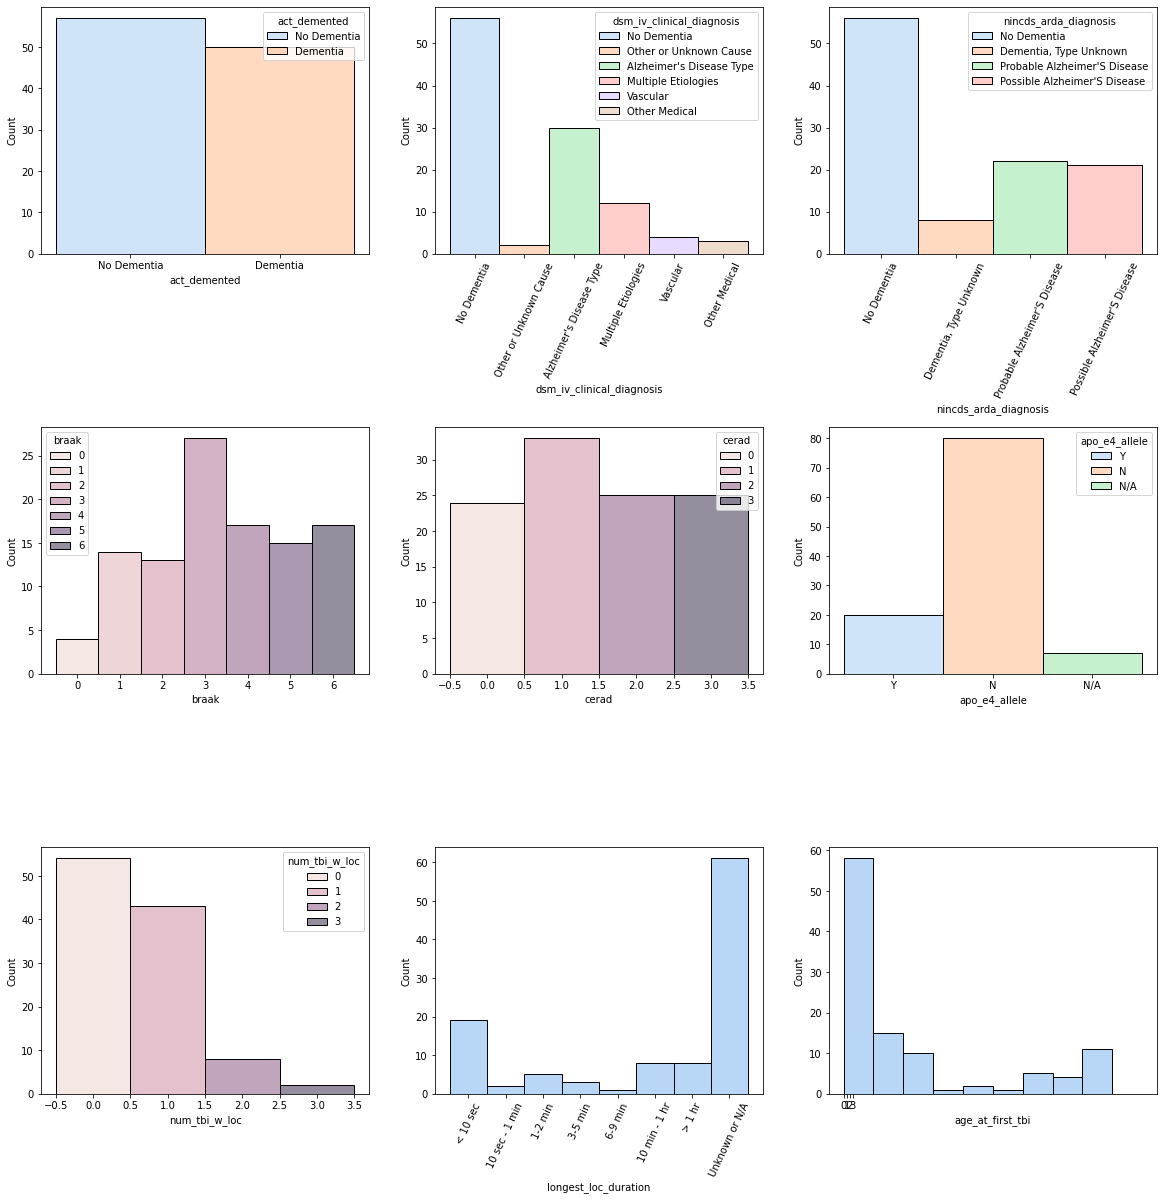

In [9]:
fig, axs = plt.subplots(3,3,figsize=(20,20))
fig.subplots_adjust(hspace=0.7, wspace=0.2)
#fig.tight_layout()
sns.histplot(donor_df,  x="act_demented", hue="act_demented",  ax=axs[0][0])
axs[0][1].tick_params(axis='x',labelrotation=65)
sns.histplot(donor_df,  x="dsm_iv_clinical_diagnosis", hue="dsm_iv_clinical_diagnosis",  ax=axs[0][1])

axs[0][2].tick_params(axis='x',labelrotation=65)
sns.histplot(donor_df,  x="nincds_arda_diagnosis", hue="nincds_arda_diagnosis",  ax=axs[0][2])
sns.histplot(donor_df,  x="braak", hue="braak", bins=np.arange(8)-0.5,  ax=axs[1][0])
plt.xticks(range(4))
sns.histplot(donor_df,  x="cerad", hue="cerad", bins=np.arange(5)-0.5,  ax=axs[1][1])
sns.histplot(donor_df,  x="apo_e4_allele", hue="apo_e4_allele",  ax=axs[1][2])

plt.xticks(range(4))
sns.histplot(donor_df,  x="num_tbi_w_loc", hue="num_tbi_w_loc", bins=np.arange(5)-0.5,  ax=axs[2][0])
axs[2][1].tick_params(axis='x',labelrotation=65)
sns.histplot(donor_df,  x="longest_loc_duration", ax=axs[2][1])

sns.histplot(donor_df,  x="age_at_first_tbi", bins= np.arange(0, 101, 10).tolist(),  ax=axs[2][2])

plt.show()

Explore the relationships between age and dementia pathologies

In [31]:
donor_df['cerad'] = donor_df['cerad'].astype('Int64')
cerad0 = donor_df['age'][donor_df['cerad']==0].reset_index(drop=True)
cerad1 = donor_df['age'][donor_df['cerad']==1].reset_index(drop=True)
cerad2 = donor_df['age'][donor_df['cerad']==2].reset_index(drop=True)
cerad3 = donor_df['age'][donor_df['cerad']==3].reset_index(drop=True)
cerad_df=pd.concat([cerad0,cerad1, cerad2,cerad3],axis=1).astype('Int64')
cerad_df.columns=['0', '1', '2','3']
cerad_melt_df = pd.melt(cerad_df)
cerad_melt_df= cerad_melt_df.dropna()
cerad_melt_df.columns=[ 'CERAD Score', 'Age']

In [28]:
donor_df['braak'] = donor_df['braak'].astype('Int64')
braak0 = donor_df['age'][(donor_df['braak']>=0) & (donor_df['braak']<=2)].reset_index(drop=True)
braak1 = donor_df['age'][(donor_df['braak']>=3) & (donor_df['braak']<=4)].reset_index(drop=True)
braak2 = donor_df['age'][(donor_df['braak']>=5) & (donor_df['braak']<=6)].reset_index(drop=True)
braak_df=pd.concat([braak0, braak1, braak2],axis=1).astype('Int64')
braak_df.columns=['0-2', '3-4', '5-6']
braak_melt_df = pd.melt(braak_df)
braak_melt_df= braak_melt_df.dropna()
braak_melt_df= braak_melt_df.dropna()
braak_melt_df.columns=['Braak Stage', 'Age']

<AxesSubplot:title={'center':'Age and Braak Stage'}, xlabel='Braak Stage', ylabel='Age'>

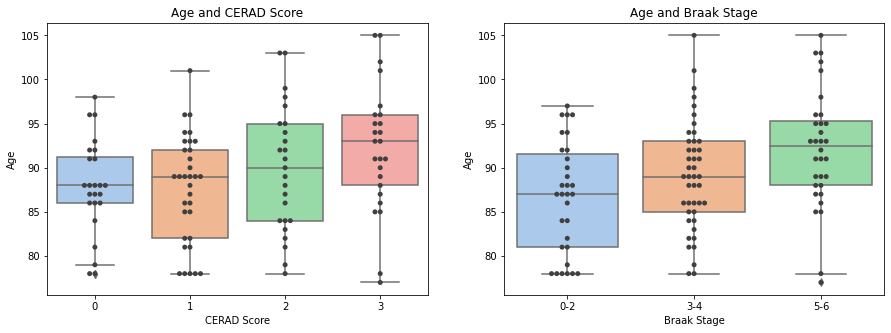

In [44]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='CERAD Score', y='Age', data=cerad_melt_df, ax=axs[0]).set(title='Age and CERAD Score')
sns.swarmplot(x='CERAD Score', y='Age', data=cerad_melt_df,color=".25", ax=axs[0])
sns.boxplot(x='Braak Stage', y='Age', data=braak_melt_df, ax=axs[1]).set(title='Age and Braak Stage')
sns.swarmplot(x='Braak Stage', y='Age', data=braak_melt_df,color=".25", ax=axs[1])

Plots For Dementia/AD Vs Pathology Metrics

In [38]:
cerad_N = donor_df['cerad'][donor_df['act_demented']=='No Dementia'].reset_index(drop=True)
cerad_Y = donor_df['cerad'][donor_df['act_demented']=='Dementia'].reset_index(drop=True)
cerad_dementia_df=pd.concat([cerad_N, cerad_Y],axis=1).astype('Int64')
cerad_dementia_df.columns=['No', 'Yes']
cerad_dementia_melt_df = pd.melt(cerad_dementia_df)
cerad_dementia_melt_df= cerad_dementia_melt_df.dropna()
cerad_dementia_melt_df= cerad_dementia_melt_df.dropna()
cerad_dementia_melt_df.columns=['Dementia Diagnosis?', 'CERAD Score']

In [41]:
braak_N = donor_df['braak'][donor_df['act_demented']=='No Dementia'].reset_index(drop=True)
braak_Y = donor_df['braak'][donor_df['act_demented']=='Dementia'].reset_index(drop=True)
braak_dementia_df=pd.concat([braak_N, braak_Y],axis=1).astype('Int64')
braak_dementia_df.columns=['No', 'Yes']
braak_dementia_melt_df = pd.melt(braak_dementia_df)
braak_dementia_melt_df= braak_dementia_melt_df.dropna()
braak_dementia_melt_df= braak_dementia_melt_df.dropna()
braak_dementia_melt_df.columns=['Dementia Diagnosis?', 'Braak Stage']

<AxesSubplot:title={'center':'Braak Stage and Dementia'}, xlabel='Dementia Diagnosis?', ylabel='Braak Stage'>

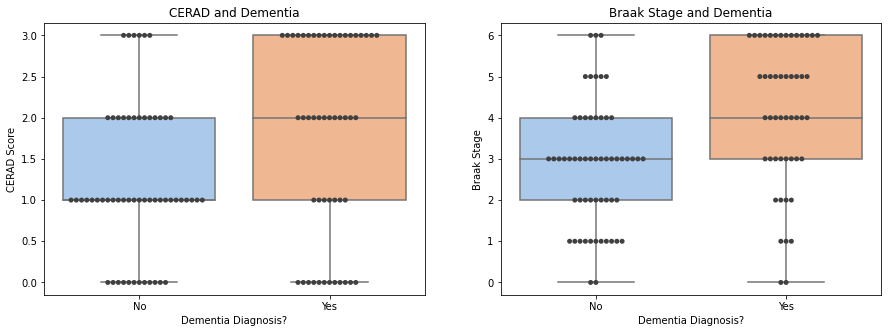

In [47]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Dementia Diagnosis?', y='CERAD Score', data=cerad_dementia_melt_df, ax=axs[0]).set(title='CERAD and Dementia')
sns.swarmplot(x='Dementia Diagnosis?', y='CERAD Score', data=cerad_dementia_melt_df,color=".25", ax=axs[0])
sns.boxplot(x='Dementia Diagnosis?', y='Braak Stage', data=braak_dementia_melt_df, ax=axs[1]).set(title='Braak Stage and Dementia')
sns.swarmplot(x='Dementia Diagnosis?', y='Braak Stage', data=braak_dementia_melt_df,color=".25", ax=axs[1])


In [13]:
#TODO: correlation/regression on dementia? TBI numbers and duration

# More females in dementia group relative to nondementia:  [1] 0.1011616
# More females in TBI group relative to non TBI:           [1] 0.5345084
# More >0 APOE in dementia group relative to nondementia:  [1] 0.02116414
# More >0 APOE in TBI group relative to non TBI:           [1] 0.5142519
# More dementia donors in TBI group relative to non TBI:   [1] 0.2083164
# apo_e4_allele vs Tau level vs A-beta buildup, increase risk of AD, demential with lewy bodies.